In [1]:
import torch
from torchvision import transforms
import torchvision
import math
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
def brightness(r, g, b):
    return 0.2126*r + 0.7152*g + 0.0722*b

In [4]:
def calculate(video):
    t,c,h,w = video.shape
    brightness_ratings = torch.zeros(t)

    idx = 0
    for frame in video:
        r_mean = torch.mean(frame[0].float())
        g_mean  = torch.mean(frame[1].float())
        b_mean  = torch.mean(frame[2].float())


        brightness_ratings[idx] = brightness(r_mean, g_mean, b_mean)

        idx += 1
    return brightness_ratings

In [5]:
ratings = []
avgs = []
stds = []
names = os.listdir('videos')
for i in range(len(names)):
    if names[i] != '.ipynb_checkpoints':
        video_fp = 'videos/' + names[i]
        video = torchvision.io.read_video(video_fp, pts_unit='sec', output_format='TCHW')[0]
        brightness_ratings = calculate(video)
        ratings.append(brightness_ratings)
        avgs.append((brightness_ratings.sum() / len(brightness_ratings)).item())
        stds.append(torch.std(brightness_ratings).item())

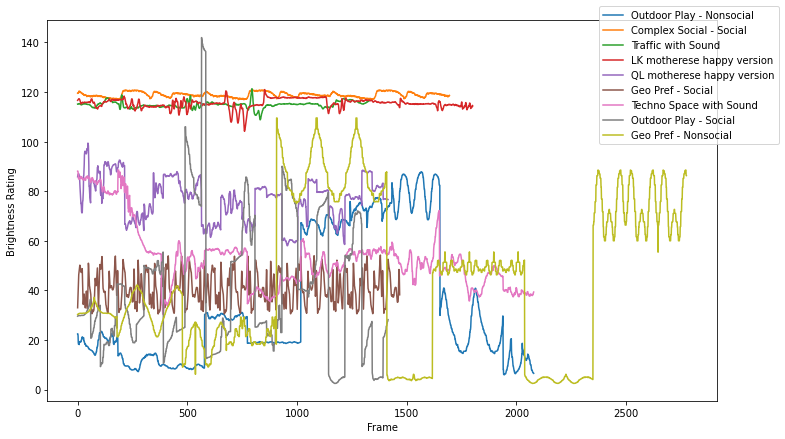

In [6]:
plt.figure(figsize=(12,7))
for i, array in enumerate(ratings):
    if names[i] != '.ipynb_checkpoints':
        plt.plot(ratings[i][20:-50].numpy(), label=names[i].replace('.mp4', '').split('_')[0])
    
plt.xlabel('Frame')
plt.ylabel('Brightness Rating')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

In [7]:
data = []
for i in range(len(avgs)):
    if names[i] != '.ipynb_checkpoints':
        data += [[names[i].replace('.mp4', '').split('_')[0], avgs[i], stds[i]]]

In [8]:
df = pd.DataFrame(data, columns=['Filename', 'Mean', 'Standard Deviation'])

<Axes: xlabel='Filename', ylabel='Mean Brightness'>

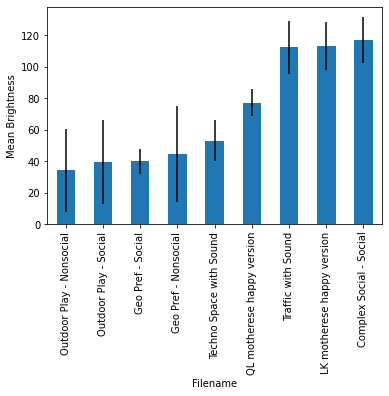

In [13]:
df.sort_values(by='Mean').set_index('Filename').plot.bar(yerr='Standard Deviation', ylabel='Mean Brightness', legend=False)

In [10]:
df.to_csv('luminance_ratings.csv', index=False)